## Income Group Classification

Context

Low back pain is a major cause of morbidity in the developed world, affecting 40% of people at some point in their lives. Back pain can be caused by a variety of problems with any parts of the complex, interconnected network of spinal muscles, nerves, bones, discs, or tendons in the lumbar spine.

An irritation or problem with any of these structures can cause lower back pain and/or pain that radiates or is referred to other parts of the body. Many lower back problems also cause back muscle spasms, which don't sound like much but can cause severe pain and disability.

While lower back pain is extremely common, the symptoms and severity of lower back pain vary greatly.

The spine of each patient was classified as - normal or abnormal, by practitioners, using the collected physical spine details/data.
Objective:

The objective is to build a predictive model on this data to help predict back pain.
Dataset:

    Pelvic_incidence: angle between a line perpendicular to the sacral plate at its midpoint and a line connecting this point to the femoral head axis.
    Pelvic tilt: is a position-dependent parameter defined as the angle created by a line running from the sacral endplate midpoint to the center of the bifemoral heads and the vertical axis
    Lumbar_lordosis_angle: is defined by the angle between the upper plane of the L1 lumbar vertebrae and the upper plane of the S1 sacral vertebrae.
    Sacral_slope: is defined as the angle between the horizontal and the sacral plate, and is a critical spinal parameter in the analysis of sagittal balance.
    Pelvic_radius: The distance from the hip axis to the posterior-superior corner of the S1 endplate
    Degree_spondylolisthesis: spondylolisthesis is a forward slip of one vertebra. Spondylolisthesis usually occurs towards the base of your spine in the lumbar area. The degree of spondylolisthesis describes the severity of the vertebral body slipped forward.
    Pelvic_slope: is the angle between a vertical line and the CS segment
    Direct_tilt: No Information
    Thoracic_slope: thoracic angle between T1 slope and neck tilt
    Cervical_tilt:n angle formed between the vertical line from the center of T1UEP and the line from the center of T1UEP to the center of the C2 vertebra
    Sacrum_angle: is the angle formed by the true conjugate with the two pieces of the sacrum.
    Scoliosis_slope: Scoliosis is a sideways curvature of the spine it represents the angle formed from the curvature of the spine
    Status:- Normal or Abnormal



### Loading Libraries

In [1]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

import warnings

warnings.filterwarnings("ignore")
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
)

Generating grammar tables from /Users/johnnoble/opt/anaconda3/lib/python3.8/site-packages/blib2to3/Grammar.txt
Writing grammar tables to /Users/johnnoble/Library/Caches/black/19.10b0/Grammar3.8.12.final.0.pickle
Writing failed: [Errno 2] No such file or directory: '/Users/johnnoble/Library/Caches/black/19.10b0/tmpqm0lx07c'
Generating grammar tables from /Users/johnnoble/opt/anaconda3/lib/python3.8/site-packages/blib2to3/PatternGrammar.txt
Writing grammar tables to /Users/johnnoble/Library/Caches/black/19.10b0/PatternGrammar3.8.12.final.0.pickle
Writing failed: [Errno 2] No such file or directory: '/Users/johnnoble/Library/Caches/black/19.10b0/tmpbm0itoh9'


<IPython.core.display.Javascript object>

### Note: The first section of the notebook is the section that has been covered multiple times in the previous case studies.  For this discussion this part can be skipped and we can directly refer to this **<a href = #link1>summary</a>** of data cleaning steps and observations from EDA.

### Load data

In [21]:
who = pd.read_csv("backpain.csv")

<IPython.core.display.Javascript object>

In [22]:
# copying data to another variable to avoid any changes to original data
data = who.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset.

In [23]:
data.head()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


<IPython.core.display.Javascript object>

In [24]:
data.tail()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Status
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


<IPython.core.display.Javascript object>

### Understand the shape of the dataset.

In [25]:
data.shape

(310, 13)

<IPython.core.display.Javascript object>

* The dataset has 32561 rows and 14 columns 

### Check the data types of the columns for the dataset.

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Status                    310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


<IPython.core.display.Javascript object>

* We see that names of the columns have spaces, dots, and dash which we will remove as they should not be present in column names. We are doing this to maintain uniformity among the column names.
* Dependent variable is the salary which is of categorical type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type.
* There are no missing values in the dataset.

In [27]:
# fixing the names of columns as there are dots, spaces  in columns names
data.columns = [col.replace(" ", "_") for col in data.columns]
data.columns = [col.replace("-", "_") for col in data.columns]
data.columns = [col.replace(".", "") for col in data.columns]

<IPython.core.display.Javascript object>

In [28]:
print(data.columns)

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis',
       'pelvic_slope', 'Direct_tilt', 'thoracic_slope', 'cervical_tilt',
       'sacrum_angle', 'scoliosis_slope', 'Status'],
      dtype='object')


<IPython.core.display.Javascript object>

* The column names are fixed

### Summary of the dataset.

In [29]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
pelvic_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
lumbar_lordosis_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
sacral_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
pelvic_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
degree_spondylolisthesis,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082
pelvic_slope,310.0,0.472979,0.285787,0.003220,0.224367,0.475989,0.704846,0.998827
Direct_tilt,310.0,21.321526,8.639423,7.027000,13.054400,21.907150,28.954075,36.743900
thoracic_slope,310.0,13.064511,3.399713,7.037800,10.417800,12.938450,15.889525,19.324000
cervical_tilt,310.0,11.933317,2.893265,7.030600,9.541140,11.953835,14.371810,16.821080


<IPython.core.display.Javascript object>

**Lets us look at different levels in categorical variables**

In [30]:
# filtering object type columns
cat_columns = data.describe(include=["object"]).columns
cat_columns

Index(['Status'], dtype='object')

<IPython.core.display.Javascript object>

In [31]:
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Status are :
Abnormal    210
Normal      100
Name: Status, dtype: int64
**************************************************


<IPython.core.display.Javascript object>

In [33]:
## DATA PREPROCESSING
# replace the ‘status' column contains
# the values 'abnormal' and 'normal'  with
# 1 and  0 :
data["Status"] = data["Status"].map({"Abnormal": 1, "Normal": 0})

<IPython.core.display.Javascript object>

## Univariate Analysis

In [34]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

array([[<AxesSubplot:title={'center':'Direct_tilt'}>,
        <AxesSubplot:title={'center':'cervical_tilt'}>],
       [<AxesSubplot:title={'center':'degree_spondylolisthesis'}>,
        <AxesSubplot:title={'center':'lumbar_lordosis_angle'}>],
       [<AxesSubplot:title={'center':'pelvic_incidence'}>,
        <AxesSubplot:title={'center':'pelvic_radius'}>],
       [<AxesSubplot:title={'center':'pelvic_slope'}>,
        <AxesSubplot:title={'center':'pelvic_tilt'}>],
       [<AxesSubplot:title={'center':'sacral_slope'}>,
        <AxesSubplot:title={'center':'sacrum_angle'}>],
       [<AxesSubplot:title={'center':'scoliosis_slope'}>,
        <AxesSubplot:title={'center':'thoracic_slope'}>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubp

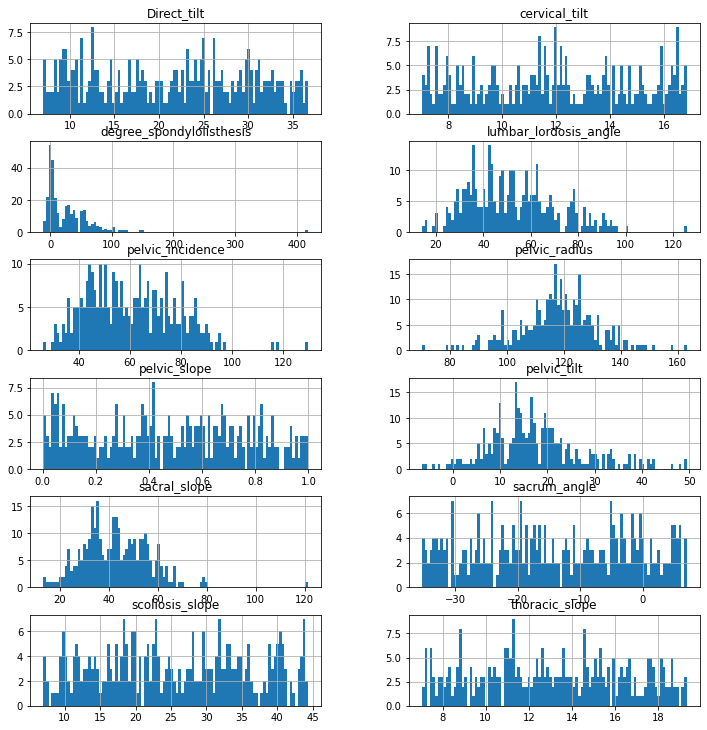

<IPython.core.display.Javascript object>

In [35]:
columns = list(data)[0:-1]  # Excluding Outcome column which has only
data[columns].hist(stacked=False, bins=100, figsize=(12, 30), layout=(14, 2))
# Histogram of first 8 columns

In [37]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

### Observations on workclass

In [ ]:
labeled_barplot(data, "workclass", perc=True)

* ~70% of the observations are from the Private sector working class.
* As expected from the number of hours per week.

### Observations on marital_status

In [ ]:
labeled_barplot(data, "marital_status", perc=True)

* 46.1% of the observations in the dataset are married followed by 32.8% of the people who never married.

### Observations on native_country

In [ ]:
labeled_barplot(data, "native_country", perc=True)

* 94% of the people are native to north_america followed by 2.1% Asians.

### Observations on salary

In [ ]:
labeled_barplot(data, "salary", perc=True)

* ~24% of the observations have a salary above 50K and while ~76% have a salary below 50K

## Bivariate analysis

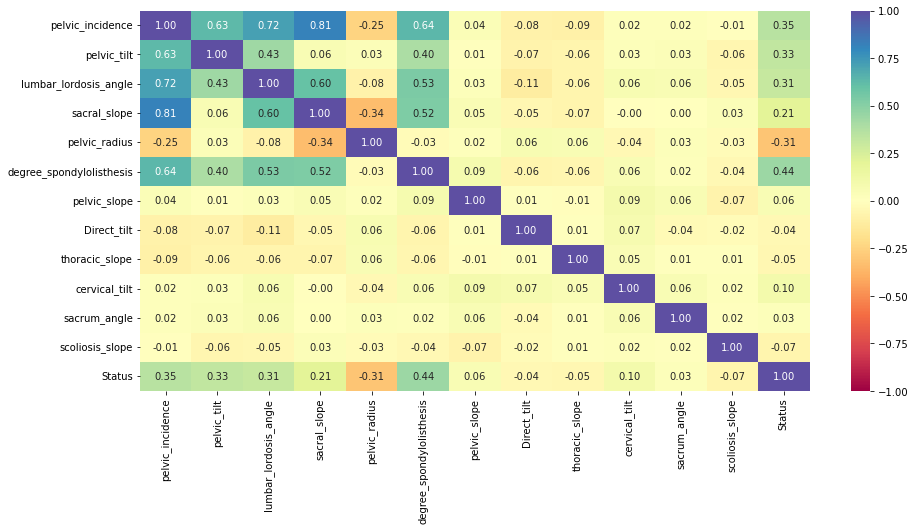

<IPython.core.display.Javascript object>

In [38]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* There is no significant correlation between the columns.

In [ ]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x):
    sns.set()
    ## crosstab
    tab1 = pd.crosstab(x, data["salary"], margins=True).sort_values(
        by=" >50K", ascending=False
    )
    print(tab1)
    print("-" * 120)
    ## visualising the cross tab
    tab = pd.crosstab(x, data["salary"], normalize="index").sort_values(
        by=" >50K", ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(17, 7))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [39]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

In [ ]:
stacked_barplot(data, "sex", "salary")

* ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* This shows the pay gap that exists in society and the government should investigate further on it to formulate policy to ensure equal pay.

### salary vs education

In [ ]:
stacked_barplot(data, "education", "salary")

* ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above $50K.
* This clearly shows a positive relationship between education and salary, the higher the education higher is the salary.

### salary vs occupation

In [ ]:
stacked_barplot(data, "occupation", "salary")

- ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above $50,000
- People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.

### salary vs race

In [ ]:
stacked_barplot(data, "race", "salary")

* 25% of the White and Asia-Pacific people have a salary more than 50K salary as compared to people from other race.

### salary vs workclass

In [ ]:
stacked_barplot(data, "workclass", "salary")

* ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K.
* ~20% of the people working in the private sector earn more than 50K.

### salary vs marital_status

In [ ]:
stacked_barplot(data, "marital_status", "salary")

* Married people have a higher likelihood of getting a salary above 50K compared to Never Married and Not married people.

In [40]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,  # change to True to show outliers
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### salary vs age

In [ ]:
distribution_plot_wrt_target(data, "age", "salary")

* People who more than 50K salary are generally older having an average age of around 48 years.
* People who have less than 50K salary have an average age of around 36.

### salary vs working_hours_per_week

In [ ]:
distribution_plot_wrt_target(data, "working_hours_per_week", "salary")

* Majority of people having above 50K salary work around 40 hours per week.
* Those having >50K salary have a higher range of working hours as compared to the ones with <=50K, but there are outliers present.

In [ ]:
# lets see how working hours per week vary across different occupation
plt.figure(figsize=(15, 12))
sns.boxplot(
    y="workclass", x="working_hours_per_week", data=data, hue="salary", showfliers=False
)
plt.show()

* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.
* Without pay and never worked will have no income or less than 50K income.
* The number of working hours for many government employees is concentrated at 40 hrs a week, which makes sense as government employees generally have fixed working hours.

### <a id='link1'>Summary of EDA</a>
**Data Description:**

* Dependent variable is the salary which is of categorical data type.
* age, capital gain, and capital loss are of integer type while other variables are of categorical type
* There are no missing values in the dataset.

**Data Cleaning:**

* We observed that all the observations where workclass = ? the values in the occupation are ? 
* The strong pattern between workclass and occupation makes sense as both of these variables capture similar information.
* There is no strong correlation of ? observations in occupation and workclass with native_country.
* For now we will replaced these ?'s with the 'unknown' category.
* There are 42 distinct countries in the data set, which were reduced to their respective continents to reduce the dimension of data and we now have only 5 distinct values in the data.
* We reduced the distinct groups of marital_status to three categories: Married, Not-Married and Never-Married.

**Observations from EDA:**

* `age`: Average age of people in the dataset is 38 years, age has a wide range from 17 to 90 years.
* `education_no_of_years`: The average education in years is 10 years. There's a large difference between the minimum value and 25th percentile which indicates that there might be outliers present in this variable.
* `capital_gain`: There's a huge difference in the 75th percentile and maximum value of capital_gain indicating the presence of outliers. Also, 75% of the observations are 0.
* `capital_loss`: Same as capital gain there's a huge difference in the 75th percentile and maximum value indicating the presence of outliers. Also, 75% of the observations are 0.
* `working_hours_per_week`: On average people work for 40 hours a week. A vast difference in minimum value and 25th percentile, as well as 75th percentile and the maximum value, indicates that there might be outliers present in the variable.
* `fnlwght`: fnlwght is right-skewed. It has lots of outliers on the right side which we can cap.
* `working_hours_per_week`: Most of the data is concentrated around 40 working hours this gives a sense that most of the observations in data might be salaried employees working 8hrs 5 days a week. Some of the observations are clear outliers like working  1 hour a week which needs to be treated.
* `workclass`: ~70% of the observations are from the Private sector working class.
* `marita_status`: 47.3% of the observations in the dataset are married followed by 32.8% of the people who never married.
* `race`: * 94% of the people are native to north_america followed by 2.1% Asians.
* `salary vs sex`: ~25% of the males have salary >50K whereas only ~15% of the females have salary >50K.
* `salary vs occupation`: - ~50% of the people whose occupation is of Executive Manager, Professor-speciality have a salary above 50,000 dollars. People with occupations like Private house service,handlers-cleaners, farming-fishing have a higher likelihood of having below 50K salary.
* `salary vs education`: ~70% of the people of are Doctorate, graduate from Professional school program (Prof-school) have a salary above 50K dollars
* `salary vs workclass`: ~50% of the self-employed people have a salary above 50K followed by ~40% of the federal govt employee who has salary more than 50K. ~20% of the people working in the private sector earn more than 50K.
* `salary vs working_hours_per_week`: Majority of people having above 50K salary work around 40 hours per week.
* Private sector employees work for more hours to get a salary above 50K.
* There's large variability in the working hours of self-employed people which makes sense as they might be working at their ease.

### Actions for data pre-processing:

* Many variables have outliers that need to be treated.
* We can drop capital_gain and capital_loss as most of the observations are 0 in these variables, and if the government already knows a person's capital gain or loss it will be easier for them to classify a person into a salary group.

### Data Pre-Processing

* Dropping capital_gain and capital_loss
* There are many outliers in the data which we will treat (perform capping of outliers).
* All the values smaller than the lower whisker will be assigned the value of the lower whisker, and all the values above the upper whisker will be assigned the value of the upper whisker.

**Dropping capital_gain and capital_loss**

In [ ]:
data.drop(["capital_gain", "capital_loss"], axis=1, inplace=True)

**Outliers detection using boxplot**

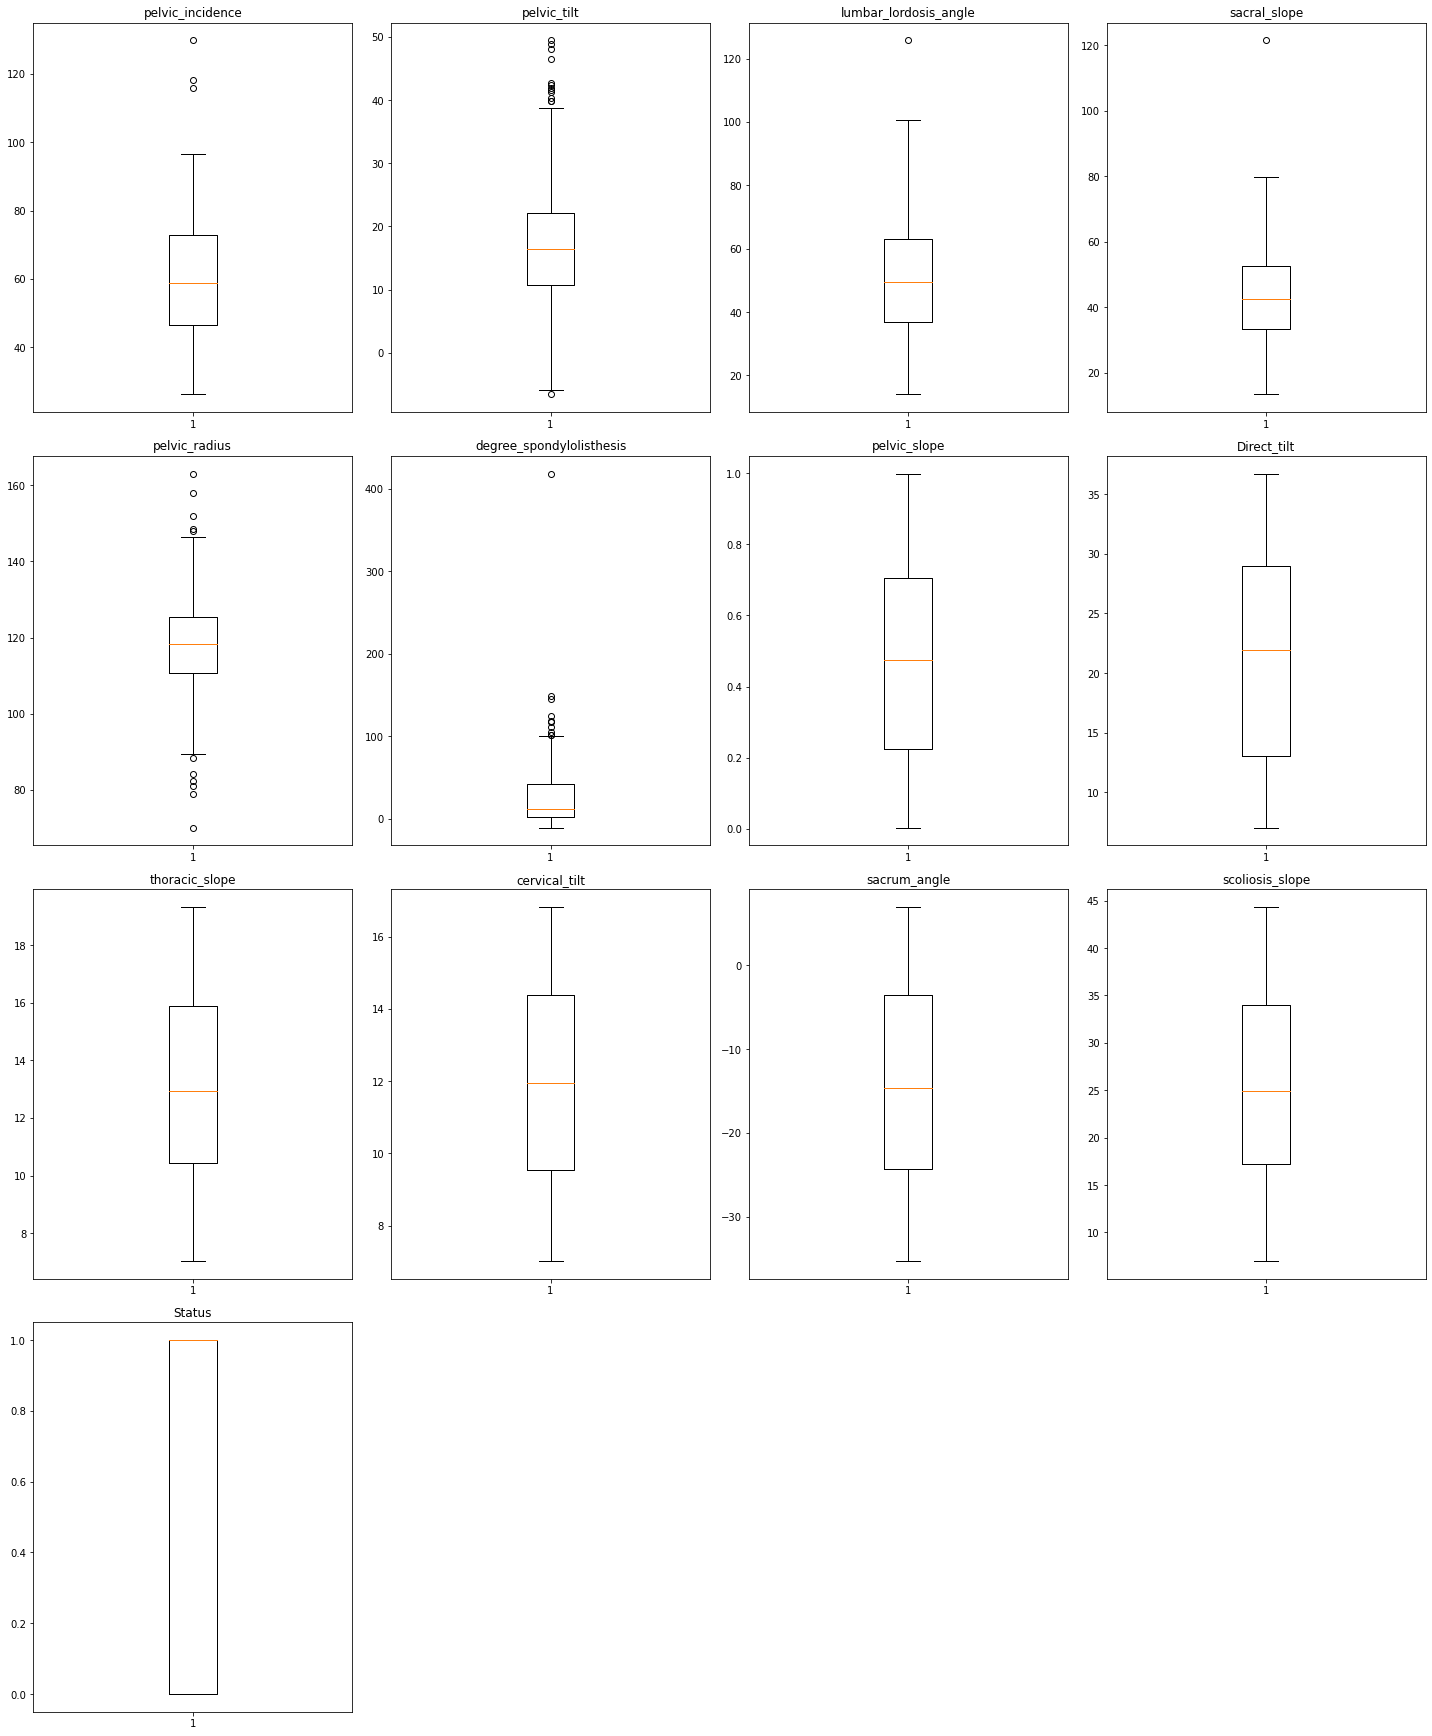

<IPython.core.display.Javascript object>

In [41]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

* Age and fnlwgt have upper outliers. 
* education_no_years has lower outliers. 
* working_hours_per_week has both upper and lower outliers.

### Treating Outliers

In [42]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [43]:
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

<IPython.core.display.Javascript object>

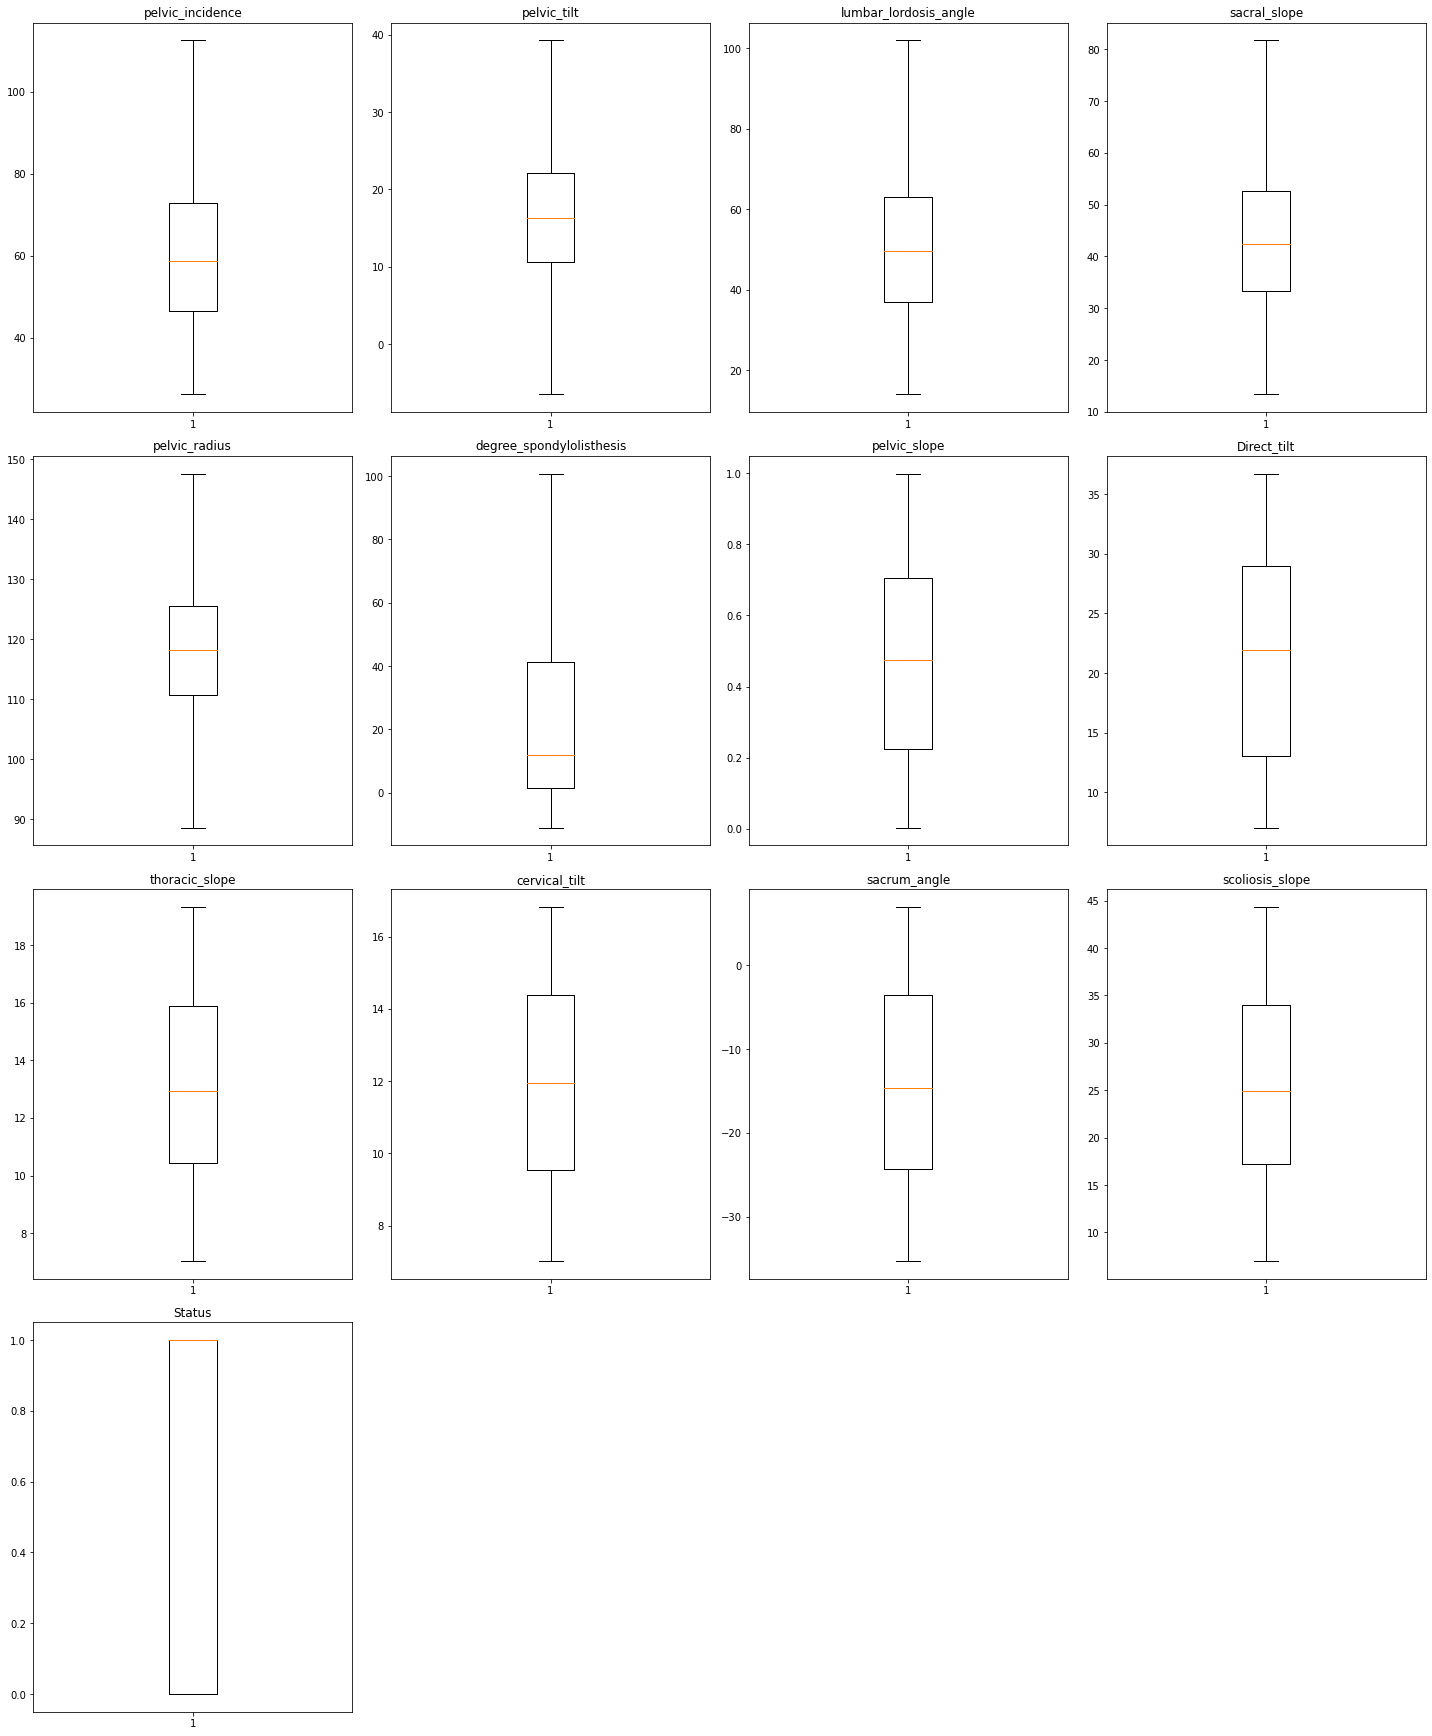

<IPython.core.display.Javascript object>

In [44]:
# let's look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation

**Encoding >50K as 0 and <=50K as 1 as government wants to find underprivileged section of society.**

**Creating training and test sets.**

In [46]:
X = data.drop(["Status"], axis=1)
Y = data["Status"]

X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [47]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (217, 12)
Shape of test set :  (93, 12)
Percentage of classes in training set:
1    0.663594
0    0.336406
Name: Status, dtype: float64
Percentage of classes in test set:
1    0.709677
0    0.290323
Name: Status, dtype: float64


<IPython.core.display.Javascript object>

### Building the model

### Model evaluation criterion

### Model can make wrong predictions as:
1. Predicting a person has a salary <=50K but in reality the salary of the person is >50K.
2. Predicting a person doesn't have a salary <=50K but in reality the salary of the person is <=50k.

### Which case is more important? 
* Both the cases are important as:

* If we predict a person has a salary <=50K but actually the salary is >50K then a wrong person will be getting the benefits of the scheme and government might lose resources.

* If we predict a person doesn't have a salary <=50K but actually the salary is <=50K that person will not be able to avail the benefits of the scheme constituting to opportunity loss.


### How to reduce this loss i.e need to reduce False Negatives? ##Not TOP BE USED FOR DRUG OR CRIMINAL CASES
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_statsmodels function will be used to check the model performance of models. 
* The confusion_matrix_statsmodels function will be used to plot confusion matrix.

In [48]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [49]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

### Logistic Regression (with Sklearn library)

In [50]:
# There are different solvers available in Sklearn logistic regression
# The newton-cg solver is faster for high-dimensional data

lg = LogisticRegression(solver="newton-cg", random_state=1)
model = lg.fit(X_train, y_train)

<IPython.core.display.Javascript object>

#### Checking model performance on training set

In [51]:
# predicting on training set
y_pred_train = lg.predict(X_train)

<IPython.core.display.Javascript object>

In [52]:
print("Training set performance:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train))
print("Recall:", recall_score(y_train, y_pred_train))
print("F1:", f1_score(y_train, y_pred_train))

Training set performance:
Accuracy: 0.847926267281106
Precision: 0.8881118881118881
Recall: 0.8819444444444444
F1: 0.8850174216027875


<IPython.core.display.Javascript object>

#### Checking performance on test set

In [53]:
# predicting on the test set
y_pred_test = lg.predict(X_test)

<IPython.core.display.Javascript object>

In [54]:
print("Test set performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test))
print("Recall:", recall_score(y_test, y_pred_test))
print("F1:", f1_score(y_test, y_pred_test))

Test set performance:
Accuracy: 0.8709677419354839
Precision: 0.921875
Recall: 0.8939393939393939
F1: 0.9076923076923077


<IPython.core.display.Javascript object>

**Observations**

- The training and testing f1_scores are 0.89.

- f1_score on the train and test sets are comparable.

- This shows that the model is showing generalised results.

- We have build a logistic regression model which shows good performance on the train and test sets but to identify significant variables we will have to build a logistic regression model using the statsmodels library.

- We will now perform logistic regression using statsmodels, a Python module that provides functions for the estimation of many statistical models, as well as for conducting statistical tests, and statistical data exploration.

- Using statsmodels, we will be able to check the statistical validity of our model - identify the significant predictors from p-values that we get for each predictor variable.

### Logistic Regression (with statsmodels library)

In [56]:
X = data.drop(["Status"], axis=1)
Y = data["Status"]

X = pd.get_dummies(X, drop_first=True)

# adding constant
X = sm.add_constant(X)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

<IPython.core.display.Javascript object>

In [57]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      204
Method:                           MLE   Df Model:                           12
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.5425
Time:                        14:25:45   Log-Likelihood:                -63.397
converged:                      False   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 4.773e-26
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       22.0653      4.966      4.443      0.000      12.331      31.799
pelvic_incidence            14.8961   9217.199      0.002      0.999   -1.81e+04    1.81e

<IPython.core.display.Javascript object>

In [58]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


,Accuracy,Recall,Precision,F1
0,0.847926,0.881944,0.888112,0.885017


<IPython.core.display.Javascript object>

**Observations**

- Negative values of the coefficient shows that probability of customer being a defaulter decreases with the increase of corresponding attribute value.

- Positive values of the coefficient show that that probability of customer being a defaulter increases with the increase of corresponding attribute value.

- p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

- But these variables might contain multicollinearity, which will affect the p-values.

* We will have to remove multicollinearity from the data to get reliable coefficients and p-values.

* There are different ways of detecting (or testing) multi-collinearity, one such way is the Variation Inflation Factor.

### Additional Information on VIF

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use. 

### Multicollinearity

In [59]:
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("Series before feature selection: \n\n{}\n".format(vif_series))

Series before feature selection: 

const                       202.097377
pelvic_incidence            102.686512
pelvic_tilt                  35.258784
lumbar_lordosis_angle         3.146304
sacral_slope                 67.517845
pelvic_radius                 1.230648
degree_spondylolisthesis      2.452256
pelvic_slope                  1.025490
Direct_tilt                   1.061246
thoracic_slope                1.020343
cervical_tilt                 1.064705
sacrum_angle                  1.054556
scoliosis_slope               1.021446
dtype: float64



<IPython.core.display.Javascript object>

* As we saw in our earlier analysis that wherever workclass has ? or unknown values occupation is also ? or unknown.
* The high correlation between these variables has been highlighted in the VIF values as well.
* We will drop occupation_Unknown as we get the same information from workclass_Unknown.
* education_no_of_years, education, and some categorical levels of Occupation, Workclass, relationship, native_country, and race also exhibit high multicollinearity.

#### Removing occupation_Unknown

In [60]:
X_train1 = X_train.drop("sacral_slope", axis=1)
vif_series2 = pd.Series(
    [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])],
    index=X_train1.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series2))

Series before feature selection: 

const                       200.044918
pelvic_incidence              3.576654
pelvic_tilt                   1.817806
lumbar_lordosis_angle         2.752717
pelvic_radius                 1.220605
degree_spondylolisthesis      2.290195
pelvic_slope                  1.025490
Direct_tilt                   1.061239
thoracic_slope                1.007160
cervical_tilt                 1.059423
sacrum_angle                  1.048361
scoliosis_slope               1.020588
dtype: float64



<IPython.core.display.Javascript object>

* Removal of occupation_Unknown has fixed multicollinearity in workclass column.
* education_no_of_years and education also capture similar information and hence it is understandable that they have high VIF values.
* Now dropping education_no_of_years, and education to see which variable has a significant impact on the model's performance.

#### Dropping education_no_of_years

In [ ]:
X_train2 = X_train1.drop("education_no_of_years", axis=1)
vif_series3 = pd.Series(
    [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])],
    index=X_train2.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series3))

* Dropping education_no_of_years fixes the multicollinearity in education column.

In [62]:
logit2 = sm.Logit(y_train, X_train1.astype(float))
lg2 = logit2.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train1, y_train)

Optimization terminated successfully.
         Current function value: 0.292179
         Iterations 9
Training performance:


,Accuracy,Recall,Precision,F1
0,0.847926,0.881944,0.888112,0.885017


<IPython.core.display.Javascript object>

* No significant change in the model performance.

#### Dropping education

In [ ]:
X_train3 = X_train1.drop(
    [
        "education_ 11th",
        "education_ 12th",
        "education_ 1st-4th",
        "education_ 5th-6th",
        "education_ 7th-8th",
        "education_ 9th",
        "education_ Assoc-acdm",
        "education_ Assoc-voc",
        "education_ Bachelors",
        "education_ Doctorate",
        "education_ HS-grad",
        "education_ Masters",
        "education_ Preschool",
        "education_ Prof-school",
        "education_ Some-college",
    ],
    axis=1,
)
vif_series4 = pd.Series(
    [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])],
    index=X_train3.columns,
)
print("Series before feature selection: \n\n{}\n".format(vif_series4))

In [ ]:
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit()

print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

* No significant change in the model performance.

**Observations:**
1. Dropping education_no_of_years and education doesn't have a significant impact on the model performance.
2. We can choose any model to proceed to the next steps.
3. Here, we will go with the lg2 model - where we dropped education_no_of_years as the education column captures more specific information.
4. Some of the categorical levels of a variable have VIF>5 which can simply be ignored.

#### Summary of the model without education_no_of_years

In [63]:
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                  217
Model:                          Logit   Df Residuals:                      205
Method:                           MLE   Df Model:                           11
Date:                Tue, 02 Nov 2021   Pseudo R-squ.:                  0.5425
Time:                        14:28:46   Log-Likelihood:                -63.403
converged:                       True   LL-Null:                       -138.58
Covariance Type:            nonrobust   LLR p-value:                 1.260e-26
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       22.0750      4.967      4.444      0.000      12.339      31.811
pelvic_incidence            -0.1006      0.037     -2.696      0.007      -0.174      -0.

<IPython.core.display.Javascript object>

* In the case of 'race' all the attributes have a high p-value which means it is not significant therefore we can drop the complete variable.
* For other attributes present in the data, the p-values are high only for few dummy variables and since only one (or some) of the categorical levels have a high p-value we will drop them iteratively as sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.

* Instead, we will do the following repeatedly using a loop:
  - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
  - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
  - Repeat the above two steps till there are no columns with p-value > 0.05.


Note: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

**Dropping Race**

In [ ]:
X_train4 = X_train2.drop(
    ["race_ Asian-Pac-Islander", "race_ Black", "race_ Other", "race_ White"], axis=1
)

logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit()

print(lg4.summary())

In [ ]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train4.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train4[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

In [ ]:
X_train5 = X_train4[selected_features]

In [ ]:
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

**Now no feature has p-value greater than 0.05, so we'll consider the features in *X_train5* as the final ones and *lg5* as final model.**

### Coefficient interpretations

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age,fnlwgt,marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

###  Converting coefficients to odds
* The coefficients of the logistic regression model are in terms of log(odd), to find the odds we have to take the exponential of the coefficients. 
* Therefore, **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

In [65]:
# converting coefficients to odds
odds = np.exp(lg2.params)

# finding the percentage change
perc_change_odds = (np.exp(lg2.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train1.columns).T

,const,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
Odds,3.864182e+09,0.904297,1.210744,0.983366,0.855486,1.162798,0.809386,1.013008,0.922009,0.974077,1.012483,1.009206
Change_odd%,3.864182e+11,-9.570300,21.074423,-1.663410,-14.451420,16.279760,-19.061366,1.300799,-7.799056,-2.592283,1.248349,0.920585


<IPython.core.display.Javascript object>

### Coefficient interpretations

* `age`: Holding all other features constant a 1 unit change in Age will decrease the odds of a person having salary <=50k by 0.97 times or a 2.90% decrease in odds of having salary <=50K.
* `working_hours_per_week`: Holding all other features constant a 1 unit change in the working_hours_per_week will decrease the odds of a person having salary <=50k by 0.93 times or a decrease of 6.6% decrease in odds of having salary <=50K.
* The odds of a person whose marital status is married having a salary <=50K is 0.075 less than the person who was never married or 92.2% fewer odds of having salary <=50K. Similarly, The odds of a person whose marital status is not_married having a salary <=50K is 0.65 times less than the person who was never married or 34.04% less odds of having a salary <=50K than the person who was never married. [keeping Never_married category as a reference].
* The odds of a person having salary <=50K is 0.47 times less than the person who has done education 1st-9th, 11th or Preschool or 52.67% fewer odds of having salary <=50K. Similarly, The odds of a person who has a Doctorate having a salary <=50K is 0.04 times less than the person who has done education 1st-9th or Preschool or 95.94% less odds of having a salary <=50K. [keeping  education_ 1st-4th,education_ 5th-6th, education_ 7th-8th, education_ 9th, education_ 11th, education_ Preschool category as a reference].

`Interpretation for other attributes can be done similarly.`

#### Checking model performance on the training set

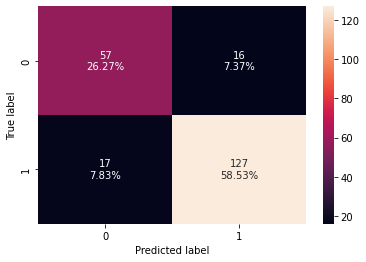

<IPython.core.display.Javascript object>

In [66]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train1, y_train)

In [67]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg2, X_train1, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.847926,0.881944,0.888112,0.885017


<IPython.core.display.Javascript object>

#### ROC-AUC

* ROC-AUC on training set

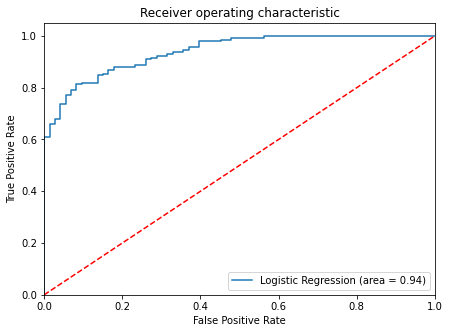

<IPython.core.display.Javascript object>

In [68]:
logit_roc_auc_train = roc_auc_score(y_train, lg2.predict(X_train1))
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Logistic Regression model is giving a good performance on training set.

### Model Performance Improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

### Optimal threshold using AUC-ROC curve

In [69]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg2.predict(X_train1))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.7154305473078173


<IPython.core.display.Javascript object>

#### Checking model performance on training set

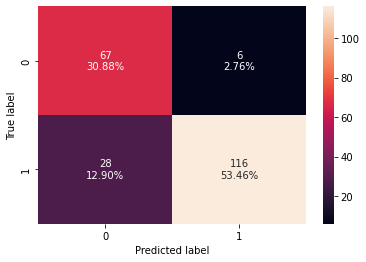

<IPython.core.display.Javascript object>

In [70]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg2, X_train1, y_train, threshold=optimal_threshold_auc_roc
)

In [71]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_train1, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.843318,0.805556,0.95082,0.87218


<IPython.core.display.Javascript object>

* Precision of model has increased but the other metrics have reduced.
* The model is still giving a good performance.

#### Let's use Precision-Recall curve and see if we can find a better threshold

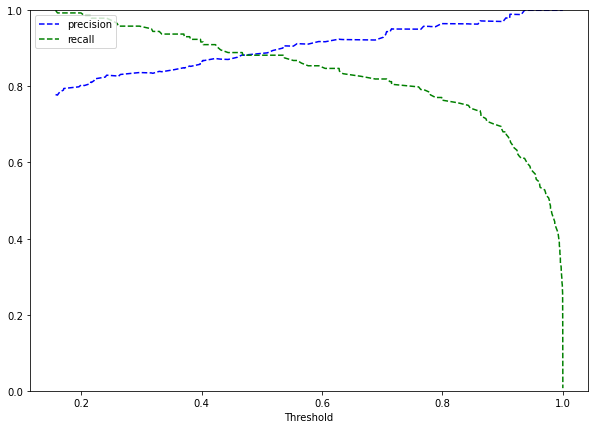

<IPython.core.display.Javascript object>

In [72]:
y_scores = lg2.predict(X_train1)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.58, we get balanced recall and precision.

In [74]:
# setting the threshold
optimal_threshold_curve = 0.48

<IPython.core.display.Javascript object>

#### Checking model performance on training set

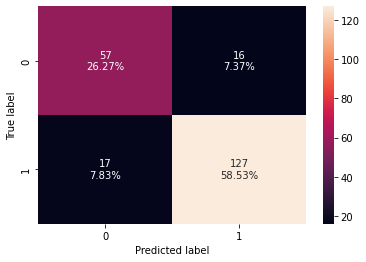

<IPython.core.display.Javascript object>

In [75]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_train1, y_train, threshold=optimal_threshold_curve)

In [77]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_train1, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.847926,0.881944,0.888112,0.885017


<IPython.core.display.Javascript object>

* Model is performing well on training set.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

### Model Performance Summary

In [79]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.48 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.48 Threshold
Accuracy,0.847926,0.843318,0.847926
Recall,0.881944,0.805556,0.881944
Precision,0.888112,0.950820,0.888112
F1,0.885017,0.872180,0.885017


<IPython.core.display.Javascript object>

### Let's check the performance on the test set

**Dropping the columns from the test set that were dropped from the training set**

In [80]:
X_test1 = X_test[list(X_train1.columns)]

<IPython.core.display.Javascript object>

**Using model with default threshold**

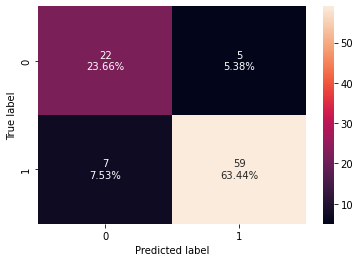

<IPython.core.display.Javascript object>

In [81]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test)

In [82]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg2, X_test1, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.870968,0.893939,0.921875,0.907692


<IPython.core.display.Javascript object>

* ROC curve on test set

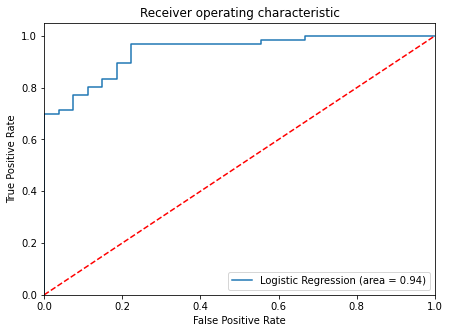

<IPython.core.display.Javascript object>

In [83]:
logit_roc_auc_train = roc_auc_score(y_test, lg2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, lg2.predict(X_test1))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

**Using model with threshold=0.76** 

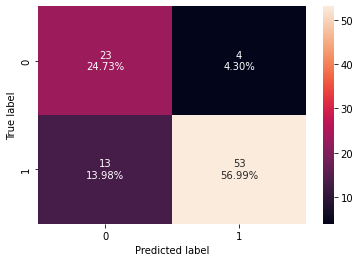

<IPython.core.display.Javascript object>

In [84]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc)

In [85]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.817204,0.80303,0.929825,0.861789


<IPython.core.display.Javascript object>

**Using model with threshold = 0.58**

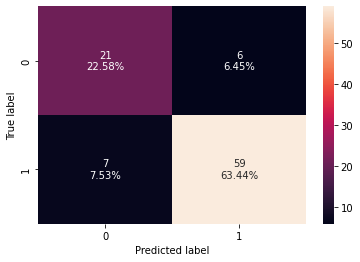

<IPython.core.display.Javascript object>

In [86]:
# creating confusion matrix
confusion_matrix_statsmodels(lg2, X_test1, y_test, threshold=optimal_threshold_curve)

In [87]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg2, X_test1, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.860215,0.893939,0.907692,0.900763


<IPython.core.display.Javascript object>

### Model performance summary

In [88]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.847926,0.843318,0.847926
Recall,0.881944,0.805556,0.881944
Precision,0.888112,0.950820,0.888112
F1,0.885017,0.872180,0.885017


<IPython.core.display.Javascript object>

In [89]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression sklearn",
    "Logistic Regression-0.76 Threshold",
    "Logistic Regression-0.58 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression sklearn,Logistic Regression-0.76 Threshold,Logistic Regression-0.58 Threshold
Accuracy,0.870968,0.817204,0.860215
Recall,0.893939,0.803030,0.893939
Precision,0.921875,0.929825,0.907692
F1,0.907692,0.861789,0.900763


<IPython.core.display.Javascript object>

### Conclusion
* We have been able to build a predictive model that can be used by the government to find the citizens having less than 50K salary with an f1_score of 0.89 on the training set and formulate policies accordingly.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of some levels of education, workclass, and native country are positive an increase in these will lead to increase in chances of a person having <=50K salary. 

* Coefficient of age,fnlwgt,marital_status, working_hours_per_week,some levels of education, workclass, and native country are negative increase in these will lead to decrease in chances of a person having <=50K salary.

### Recommendations

- The government should promote education among citizens, they should make policies to make education accessible to all, as we say in our analysis that people who have higher education are more likely to have a salary above 50,000 Dollars. 
- Working hours is one of the significant predictors of salary, The government should implement laws to ensure that people are paid fairly for their work and are not overworked for the increase in salaries. This would improve work-life balance.
- People who invest more are more likely to have a salary above 50k, government should initiate investment schemes and facilitate ease of investment so that people can plan and invest in resources.
- As we saw in our analysis that Asian-Pac-Islander and White people are paid more than other races, there should be reforms to ensure that the salary criterion of employees is independent of their race.
- Reforms should be made for private-sector employees so that they are paid fairly for their work.
- Policy formulated by the government should be considerate of equal pay and counter the pay gap that exists in society.